### The following code scrapes the most recent 100 pages of 
### roman coin sales, places them in dataframes, then scrapes the
### principal image of each of these and places those, as arrays, into a
### separate file. 

In [1]:
import datetime
from ebaysdk.finding import Connection as Finding
from ebaysdk.exception import ConnectionError
from tqdm import tqdm
import numpy as np
import pandas as pd
import requests
import re
from PIL import Image
import pickle

In [2]:
solutions = []

for page in tqdm(range(1, 100)):
    try:
        api = Finding(config_file='./ebay.yaml')
        response = api.execute('findItemsAdvanced', {'keywords': 'Roman Coin',
                                 'paginationInput': {'pageNumber': page}})
        coin = response.dict()
        solutions.append(coin)

    except ConnectionError as e:
        print(e)


100%|██████████| 99/99 [02:31<00:00,  1.53s/it]


In [3]:
#placing results in a dataframe, extracting relevant information, placing into a second dataframe
df = pd.DataFrame(solutions)

new = []
for item in df['searchResult']:
    new.append(item)

df2 = pd.DataFrame(new)

In [4]:
#Extracting the relevant information again, and placing into another dataframe
coins = []
for item in tqdm(df2['item']):
    for listing in item:
        coins.append(listing)

roman = pd.DataFrame(coins)

100%|██████████| 99/99 [00:00<00:00, 23475.58it/s]


In [5]:
#More extraction
primary_cat = []
for val in roman['primaryCategory']:
    primary_cat.append(val)

#merge into main dataframe later
primary = pd.DataFrame(primary_cat)
print(primary.shape, roman.shape)

(9900, 2) (9900, 23)


In [6]:
#Extracting prices for a price dataframe

prices = []

for price in roman['sellingStatus']:
    prices.append(price)
    
price_df = pd.DataFrame(prices)
price_df['currencyid_conv'] = [val['_currencyId'] for 
                               val in price_df['convertedCurrentPrice']]

price_df['value_conv'] = [val['value'] for 
                               val in price_df['convertedCurrentPrice']]

price_df['current_price'] = [val['value'] for 
                               val in price_df['currentPrice']]

price_df['current_currency'] = [val['_currencyId'] for 
                               val in price_df['currentPrice']]

In [7]:
#dropping unnecessary columns (information already present elsewhere)
price_df = price_df.drop(['convertedCurrentPrice', 'currentPrice'], axis=1)

In [8]:
#merging all of the constructed dataframes together
roman_coins = pd.concat([roman, primary, price_df], axis=1)

In [9]:
#Save file name with current month, day
file_name = 'uncleaned_roman_coins_' + re.sub('-', '_', str(datetime.datetime.now())[5:10])
roman_coins.to_csv(file_name)

In [112]:
#code below will scrape the principal image from each sale

# images = []
# for url in tqdm(roman_coins['galleryURL']):
#     response = requests.get(url, stream=True)
#     if response.status_code == 200:
#         response.raw.decode_content = True
#         im = Image.open(response.raw)
#         images.append(im)
#     else: 
#         images.append(np.nan)

100%|██████████| 9900/9900 [47:35<00:00,  3.47it/s]


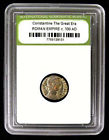

In [126]:
# import pickle
# type(images[0])
# x = np.array(images[0])
# Image.fromarray(x)

In [127]:
# array_images = [np.array(x) for x in tqdm(images)]

100%|██████████| 9900/9900 [00:07<00:00, 1364.61it/s]


In [128]:
# roman_coins['image_arrays'] = array_images

# image_df_3_1 = pd.DataFrame()
# image_df_3_1['ids'] = roman_coins['itemId'].values

# image_df_3_1['image_arrays'] = array_images

# image_df_3_1.to_csv('coin_images_3_1')